In [218]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [219]:
# Cargar datasets
train_reviews = pd.read_csv("../data/train_reviews.csv")
test_reviews = pd.read_csv("../data/test_reviews.csv")
usuarios = pd.read_csv("../data/usuarios.csv")
negocios = pd.read_csv("../data/negocios.csv")

C:\Users\aleja\AppData\Local\Temp\ipykernel_7868\2779904179.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  usuarios = pd.read_csv("../data/usuarios.csv")


In [220]:
train_reviews.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
498103,QPLS5SGe3YqDQkjzpESXWA,cunpzBkEboEewYlFofWhTQ,ZPdKYDbYKSjDkaBGYkGzOQ,5.0,0,0,0,This is my favorite restaurant. Their menu is ...,2017-11-12 05:42:35
107793,VK_YwqVhZJIz0r4SCYEkxQ,CRKNLX17sd2oIm7W5JJwfg,g-IXI3v3fOudMsyLPKb-eQ,3.0,2,0,2,This place was A-OK - nothing really blew me a...,2015-05-11 05:54:24
883567,Xpi2SKBbA8PJCBWECR4MgA,OTejMqWRU0BMi5XwXrw83A,JzAnhnShs3IETwOnmYWB1A,4.0,1,0,1,The new location is much bigger and trendier t...,2016-12-28 05:54:18
866616,6EsVzn0lYOVqFhWfP9RXZQ,Ca_M9H70S0ZE0FCjzyiStQ,znlrxrY4InSx7ekPZxoHRw,5.0,0,0,0,Yep. It's yummy. We had ice cream sandwiches...,2017-05-04 21:54:26
252751,7LdUoDu8zQnVeNwTojI0jQ,iuAuD3Bdj5Z-nFd4ETPjcg,W4r7LqEwTCtH8GdnWjojdw,5.0,0,0,0,New store at International Plaza lower level t...,2015-06-10 16:58:44


In [221]:
train_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [222]:
test_reviews.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date
293123,kMuYd067rE42g0jAji288w,0wUXKlkWV9ec55a3HC_ySw,n7dQzzjb-TuUmGK_YRlg9A,0,0,0,"Great service with excellent, dedicated staff ...",2021-12-19 17:31:40
220720,Dv6LToZRrzsBiPTmVvM8CQ,PYhbPW9fCRMhbbSPYK6GRA,2DTkzhmMpv5fIPKheePClA,2,0,0,First off i want to say the place is clean and...,2021-12-28 14:57:12
120726,cc-I9UQ79g_Fgs1g9UzoRg,hWhJ9E4mLZOGH77o-aTsQA,7U7IgKCBvUqHDoZvmunuAA,0,1,0,"take forever just to put in order , and after ...",2019-08-13 03:42:49
275284,wRpk3Zt1oE8ziDY8qpPVxA,ncYw4Fso8dzqntzDSbTvnQ,AOIPO0mvg6khJg4EYS8Jag,0,0,0,This store has an okay selection. Cashier's a...,2021-01-26 16:01:54
101264,kbaVqOy4wuxS0vMnDJrBzw,6zMjGR2t629Bt-pjO3CvCw,8vuulrqX0uw80A53wXmRSw,0,0,0,What a cute place! love the bow ties the waitr...,2016-10-13 18:22:00


In [223]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

## Usuario

In [224]:
usuarios.sample(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
232426,WOkWfTP2WWBnINaT0sY8Bg,Aleah,12,2012-06-21 18:42:06,29,13,0,NaN,"PP0oCI4G-4hM9K1LyFZJ-Q, 27dHzjWMZRNagDHrXwNXWw...",0,2.08,0,0,0,0,0,0,0,0,0,0,0
170763,FoX8khxwUr9a8Coz6I-1sA,Jen,16,2008-02-17 23:23:34,14,2,5,NaN,"mgD1cp4Jtyc2oZKQbS1Mkw, OA7rJqFztU7oRDu-MXiENw...",0,3.19,0,0,0,0,0,1,0,1,1,0,0
487132,IC0H0G09SXA4m0mA9cfVOA,Chris,7,2016-03-16 13:05:52,0,0,0,NaN,NaN,0,4.29,0,0,0,0,0,0,0,0,0,0,0
92558,8HUzFykyczPlsSn-c3OrSA,Carrie,17,2014-08-12 06:01:30,2,0,1,NaN,NaN,0,3.47,0,0,0,0,0,0,0,0,0,0,0
689213,bBty77fXbU4C5eSulnN8Sg,John,10,2015-10-13 23:26:41,1,2,1,NaN,NaN,0,2.36,0,0,0,0,0,0,0,0,0,0,0


In [225]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699619 entries, 0 to 699618
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             699619 non-null  object 
 1   name                699607 non-null  object 
 2   review_count        699619 non-null  int64  
 3   yelping_since       699619 non-null  object 
 4   useful              699619 non-null  int64  
 5   funny               699619 non-null  int64  
 6   cool                699619 non-null  int64  
 7   elite               55411 non-null   object 
 8   friends             427407 non-null  object 
 9   fans                699619 non-null  int64  
 10  average_stars       699619 non-null  float64
 11  compliment_hot      699619 non-null  int64  
 12  compliment_more     699619 non-null  int64  
 13  compliment_profile  699619 non-null  int64  
 14  compliment_cute     699619 non-null  int64  
 15  compliment_list     699619 non-nul

In [226]:
for col in usuarios.columns:
    print(usuarios[col].value_counts())

user_id
qVc8ODYU5SZjKXVBgXdI7w    1
iA1B6ah5sCh7jEwj6Ai95w    1
Y8MQz8P697xRyIGaEe4yKg    1
LQBe62Qq3cvLqsGJaEF5Rw    1
TC4aD5qZtE5oc72sSvwfOg    1
                         ..
SUokZE-eIboa2-GrO9rZVg    1
kjrFvGQnQwOWiA5u5XskHA    1
4LLGhrsgy65kcpIuiVEgmg    1
M2zqfnBr2EUI28y8aVRGng    1
wL5jPrLRVCK_Pmo4lM1zpA    1
Name: count, Length: 699619, dtype: int64
name
John       6435
Michael    5849
David      5611
Chris      5289
Mike       4795
           ... 
A Kate        1
Vil           1
Bethani       1
Efa           1
Gwendy        1
Name: count, Length: 61409, dtype: int64
review_count
1       68946
2       59690
3       51296
4       42746
5       35944
        ...  
1597        1
1375        1
1895        1
1017        1
2030        1
Name: count, Length: 1924, dtype: int64
yelping_since
2019-03-05 00:10:27    3
2015-07-08 23:52:22    2
2011-12-30 15:36:34    2
2014-07-03 19:01:30    2
2018-01-02 23:24:32    2
                      ..
2011-03-06 18:49:18    1
2009-06-05 04:34:16    1

In [227]:
usuarios.isnull().sum()

user_id                    0
name                      12
review_count               0
yelping_since              0
useful                     0
funny                      0
cool                       0
elite                 644208
friends               272212
fans                       0
average_stars              0
compliment_hot             0
compliment_more            0
compliment_profile         0
compliment_cute            0
compliment_list            0
compliment_note            0
compliment_plain           0
compliment_cool            0
compliment_funny           0
compliment_writer          0
compliment_photos          0
dtype: int64

In [228]:
new_usuarios = usuarios.drop(columns=["elite", "friends", "name"]) # ?
new_usuarios.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos'],
      dtype='object')

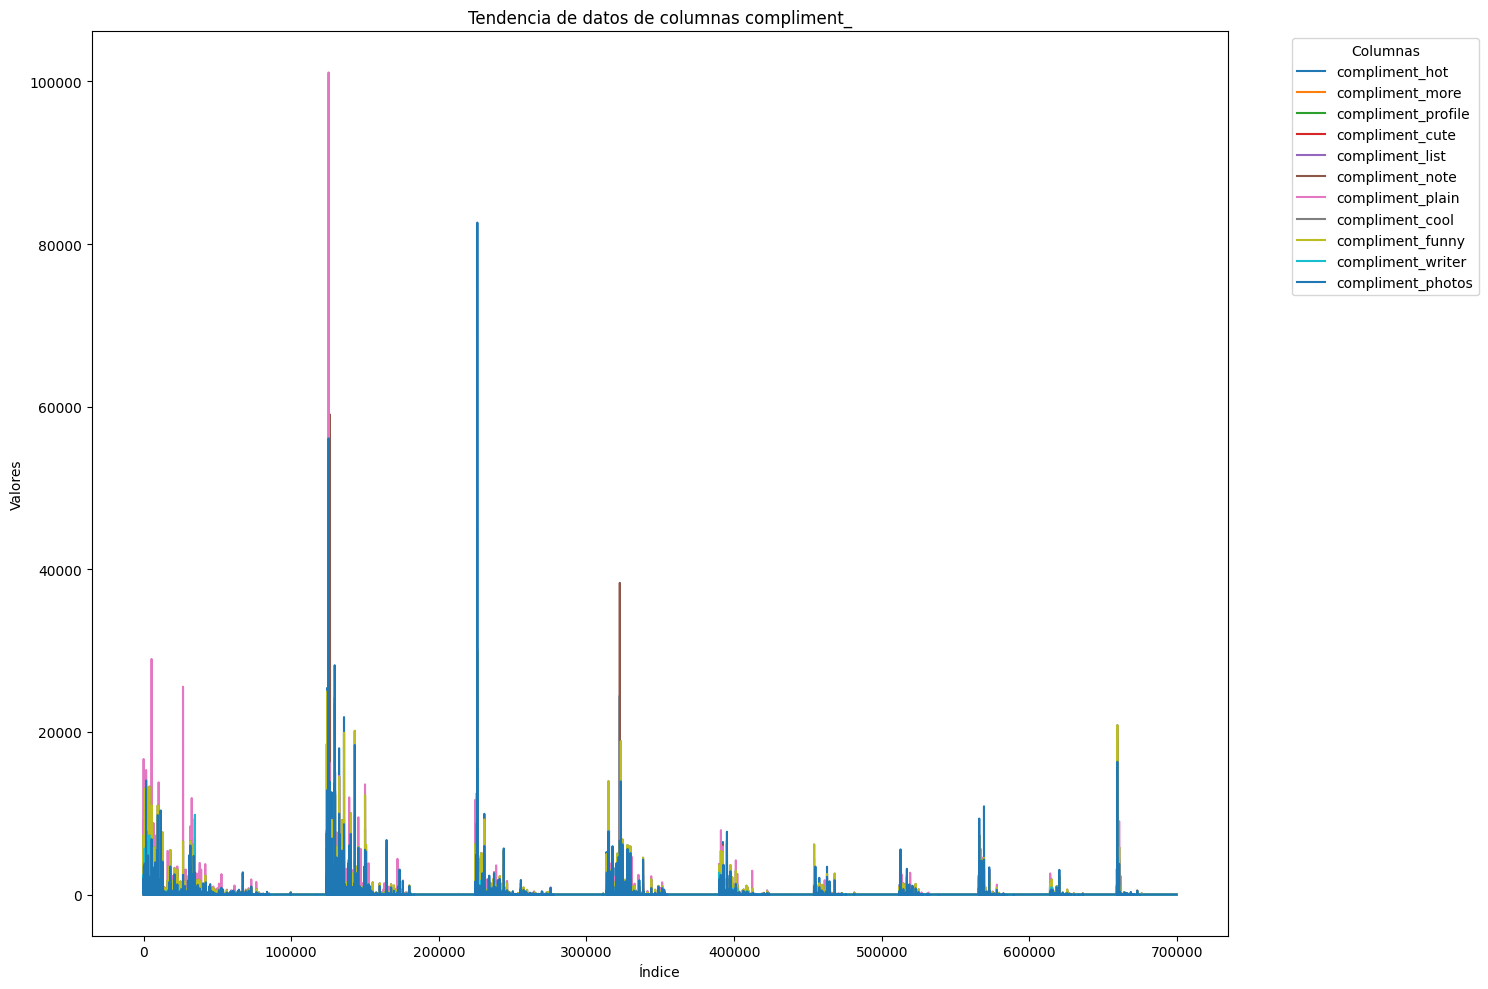

In [229]:
# Filtrar las columnas que comienzan con 'compliment_'
compliment_cols = [col for col in new_usuarios.columns if col.startswith("compliment_")]

# Crear un DataFrame con solo esas columnas
compliment_data = new_usuarios[compliment_cols]

# Crear un gráfico de distribución para cada columna
compliment_data.plot(kind='line', figsize=(15, 10), title='Tendencia de datos de columnas compliment_')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend(title='Columnas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [230]:
# Sumar todas las columnas que empiezan con 'compliment_'
new_usuarios['compliment'] = new_usuarios[compliment_cols].sum(axis=1)

# Eliminar las columnas originales si ya no son necesarias
new_usuarios = new_usuarios.drop(columns=compliment_cols)

# Verificar el resultado
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
359556,hsxOy7_S93_xurm34fn6QA,1,2018-11-15 18:07:30,1,0,0,0,1.00,0
310341,WINRnvRO7iGEhrf9iwf25A,11,2021-01-24 14:24:37,1,0,0,0,3.82,0
67796,cQ4vjLfbzl7tMGc4M8Cd8w,17,2012-10-13 22:12:04,15,5,1,0,4.37,3
403322,VAKsK7IuxVbPxpwatQpKiA,4,2016-06-20 18:08:55,6,0,1,0,2.00,0
667789,ZvKuy2KpUF6ZT2BARNB-NA,16,2013-09-27 23:44:30,5,4,2,0,4.28,0


In [231]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_usuarios["compliment"] = scaler.fit_transform(new_usuarios["compliment"].values.reshape(-1, 1))

new_usuarios["compliment"].describe()

count    6.996190e+05
mean     6.093683e-18
std      1.000001e+00
min     -3.508534e-02
25%     -3.508534e-02
50%     -3.508534e-02
75%     -3.266433e-02
max      3.925654e+02
Name: compliment, dtype: float64

In [232]:
from sklearn.preprocessing import StandardScaler

compliment_cols = ["review_count", "useful", "funny", "cool", "fans", "average_stars"]

scaler = StandardScaler()

new_usuarios[compliment_cols] = scaler.fit_transform(new_usuarios[compliment_cols])

new_usuarios[compliment_cols].describe()

,review_count,useful,funny,cool,fans,average_stars
count,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05,6.996190e+05
mean,-1.592482e-17,-5.281192e-19,3.412462e-18,-1.425922e-17,3.412462e-18,-8.092411e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.047548e-01,-7.761433e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02,-2.565867e+00
25%,-2.801503e-01,-7.661663e-02,-5.155727e-02,-5.326116e-02,-9.224837e-02,-5.093696e-01
50%,-2.309414e-01,-7.262584e-02,-4.996237e-02,-5.212889e-02,-9.224837e-02,1.888831e-01
75%,-9.151607e-02,-5.566497e-02,-4.517766e-02,-4.759982e-02,-5.714961e-02,7.149639e-01
max,1.429998e+02,2.057435e+02,2.963183e+02,2.262622e+02,4.385369e+02,1.260175e+00


In [233]:
new_usuarios['yelping_since'] = pd.to_datetime(usuarios['yelping_since'], errors='coerce')

new_usuarios['yelping_since'] = new_usuarios['yelping_since'].dt.year

new_usuarios['yelping_since'].value_counts()

yelping_since
2015    86327
2014    84032
2013    77842
2012    74207
2016    72077
2011    67727
2017    48702
2010    43511
2018    41295
2019    30608
2009    26512
2020    13342
2008    13234
2021    10252
2007     6502
2006     2407
2022      586
2005      424
2004       32
Name: count, dtype: int64

In [234]:
new_usuarios.sample(5)

,user_id,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment
453502,8whRwEKs5d29Ij6YtOUdPQ,-0.288352,2019,-0.076617,-0.051557,-0.053261,-0.092248,-2.565867,-0.035085
509736,aj8cbOTHfdW-yFJEzzm7vQ,-0.263747,2019,-0.076617,-0.051557,-0.052129,-0.092248,1.260175,-0.035085
416988,WGIOfbZQgKsvMgm5RGCbnQ,-0.263747,2018,-0.074621,-0.051557,-0.053261,-0.092248,0.781920,-0.035085
635830,Ce3_6_E6ALc-mw7O4CC4cA,-0.296553,2017,-0.077614,-0.051557,-0.053261,-0.092248,-0.652846,-0.035085
205210,ASIP6-jr792mKd8NNhyPJw,-0.280150,2019,-0.064644,-0.051557,-0.053261,-0.092248,-0.011984,-0.035085


## Negocio

In [235]:
negocios.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
18332,KHwncPVH4YKRpEPoJpiB1Q,Fire + Spice Tucson,5151 E Grant Rd,Tucson,AZ,85712,32.251665,-110.882781,3.5,41,0,"{'RestaurantsAttire': ""u'casual'"", 'BusinessAc...","Mexican, Tex-Mex, Restaurants","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
5939,B6c2TFQGCrBo-Kv9VhiFNQ,The Sparrow Salon,"116 Wilson Pike Cir, Ste 103",Brentwood,TN,37027,36.035882,-86.785573,4.5,9,1,"{'BusinessParking': ""{'garage': False, 'street...","Beauty & Spas, Hair Removal, Skin Care, Medica...","{'Tuesday': '9:0-19:0', 'Wednesday': '9:0-19:0..."
24767,gnJr9Ak8VxmPoCZTOvoOfQ,Wine and Canvas,3367 E 86th St,Indianapolis,IN,46240,39.810026,-86.388932,4.5,10,0,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Education, Arts & Entertainment, Social Clubs,...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
25788,HvgiEFVKIjXDkxvWnudakA,Fort Lowell Museum,2900 N Craycroft Rd,Tucson,AZ,85712,32.259687,-110.874732,3.5,5,1,{'GoodForKids': 'True'},"Landmarks & Historical Buildings, Arts & Enter...","{'Thursday': '9:0-16:0', 'Friday': '9:0-16:0',..."
17557,UPV51r3ZldyYHZSX8TRNlQ,Zephyr Pointe Apartments by Lincoln Zephyr Pointe,10640 N McCarran Blvd,Reno,NV,89503,39.538250,-119.863570,1.5,9,0,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Home Services, Real Estate, Apartments",NaN


In [236]:
negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   30069 non-null  object 
 1   name          30069 non-null  object 
 2   address       29068 non-null  object 
 3   city          30069 non-null  object 
 4   state         30069 non-null  object 
 5   postal_code   30057 non-null  object 
 6   latitude      30069 non-null  float64
 7   longitude     30069 non-null  float64
 8   stars         30069 non-null  float64
 9   review_count  30069 non-null  int64  
 10  is_open       30069 non-null  int64  
 11  attributes    27300 non-null  object 
 12  categories    30052 non-null  object 
 13  hours         25381 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.2+ MB


In [237]:
for col in negocios.columns:
    print(negocios[col].value_counts())

business_id
GDEEPQdYs2utMN-R4znZSA    1
zi23F23_8ao4Gz1Ecj5ywA    1
ldPcDAa_u66jQINDlutTsQ    1
9SP-J_N2DV_Dodg1VxnXoQ    1
HF9LX5776QYYK70tyIL8gw    1
                         ..
d-2fDzziIxhbDn3tzH9GTg    1
-muLz726oAXME0r6nAm4WA    1
Qp5m70lC2KorILVRdpeR0g    1
ul97zyH40F8OMTwRIgJqDQ    1
5mDnmxXBbVuNagxyyNENoQ    1
Name: count, Length: 30069, dtype: int64
name
McDonald's              158
Starbucks               143
Dunkin'                 102
Walgreens                89
Subway                   87
                       ... 
GA Foods                  1
Fuzzy's Taco Shop         1
Tampa Tattoo              1
Reno Buggie Barn          1
Old Cedar Campground      1
Name: count, Length: 25117, dtype: int64
address
160 N Gulph Rd                    20
51 N 12th St                      16
1 Terminal Dr                     10
2223 N Westshore Blvd             10
6901 22nd Ave N                    8
                                  ..
2815 Lebanon Pike                  1
123 Nutt Rd       

In [238]:
negocios.isnull().sum()

business_id        0
name               0
address         1001
city               0
state              0
postal_code       12
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2769
categories        17
hours           4688
dtype: int64

In [239]:
new_negocios = negocios.drop(columns=["hours", "name", "postal_code", "address", "latitude", "longitude"]) # ?
new_negocios.columns

Index(['business_id', 'city', 'state', 'stars', 'review_count', 'is_open',
       'attributes', 'categories'],
      dtype='object')

In [240]:
new_negocios['is_open'] = new_negocios['is_open'].apply(lambda x: True if x == 1 else False)
new_negocios.sample(5)

,business_id,city,state,stars,review_count,is_open,attributes,categories
17907,4D_9ndDcuZqzICuWImxIVw,Warminster,PA,4.5,17,True,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Nail Salons, Beauty & Spas"
5061,Sz4b74OATuK7TrxlZmk_-w,Arnold,MO,3.0,9,True,NaN,"Beauty & Spas, Nail Salons, Hair Removal, Waxing"
13616,PA09x-yvqQszO49ySccIDw,Dover,FL,4.5,5,False,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food, Restaurants, Chinese, Grocery"
25340,vt_esoDw6HG5ClM12OPkMg,Philadelphia,PA,3.5,115,False,"{'Corkage': 'False', 'HasTV': 'False', 'Alcoho...","Coffee & Tea, Restaurants, Breakfast & Brunch,..."
6069,ZYq7Vvams7_Jmxp91hKfTA,Reno,NV,5.0,11,True,"{'BusinessAcceptsCreditCards': 'False', 'ByApp...","Commercial Real Estate, Real Estate Photograph..."


In [241]:
state_counts = new_negocios['state'].value_counts()
state_counts

state
PA    6852
FL    5226
TN    2363
IN    2231
MO    2152
LA    2044
AZ    1952
NJ    1788
NV    1555
AB    1155
CA    1055
ID     881
DE     436
IL     376
WA       1
CO       1
VI       1
Name: count, dtype: int64

<Axes: title={'center': 'Distribución de Estados en new_negocios'}, xlabel='state'>

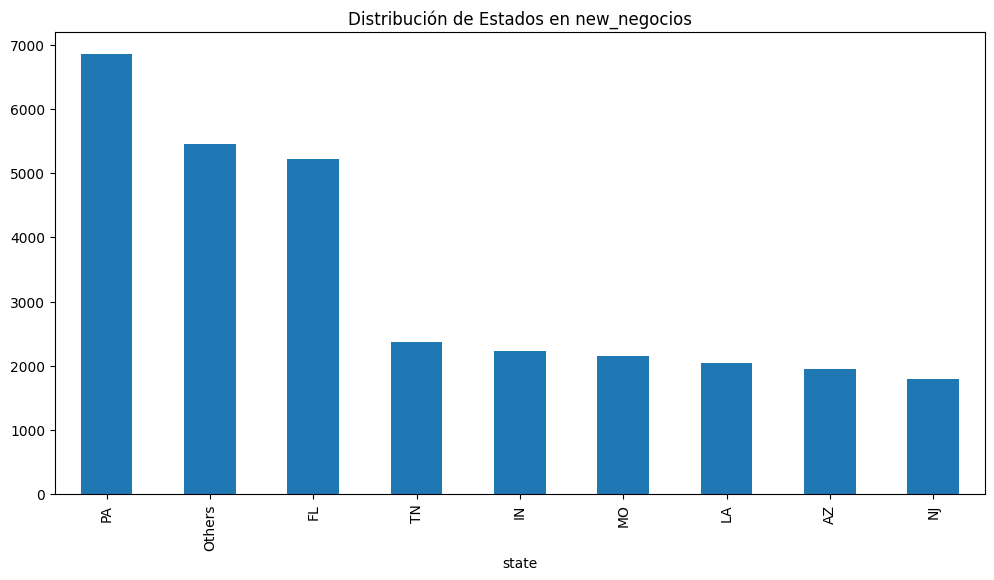

In [242]:
umbral = state_counts.mean()

# Paso 3: crear una nueva columna donde los estados raros se etiquetan como 'Others'
new_negocios['state'] = new_negocios['state'].apply(lambda x: x if state_counts[x] >= umbral else 'Others')
new_negocios['state'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Estados en new_negocios')

In [243]:
from sklearn.preprocessing import OneHotEncoder

# Crear el codificador
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Aplicar sobre la columna 'state'
state_onehot = encoder.fit_transform(new_negocios[['state']])

# Obtener los nombres de columnas codificadas
state_columns = encoder.get_feature_names_out(['state'])

# Crear DataFrame con los vectores
state_vector_df = pd.DataFrame(state_onehot, columns=state_columns, index=new_negocios.index)

# (opcional) Unirlo al dataset original
new_negocios = pd.concat([new_negocios, state_vector_df], axis=1)

In [244]:
new_negocios = new_negocios.drop(columns=["state"])

In [245]:
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
3016,gXtmgBiEvHpQ3LUA8ETo1A,Saint Petersburg,4.0,8,False,"{'BusinessAcceptsBitcoin': 'False', 'Restauran...","Hair Salons, Hair Stylists, Beauty & Spas, Hai...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26783,8qpnCNlvJN3N18dRcnD5xQ,Nashville,4.5,167,True,"{'GoodForKids': 'False', 'WiFi': ""u'no'""}","Hotels & Travel, Tours, Local Flavor",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17687,X7FQ5k29A_RRYep7TOfjtw,Santa Barbara,5.0,54,True,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Health & Medical, Beauty & Spas, Skin Care, Ac...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29934,tJYdmIZuAMz86-UoExZStg,Drexel Hill,5.0,5,False,{'BusinessAcceptsCreditCards': 'True'},"Shopping, Food, Specialty Food, Desserts, Gift...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16750,SXe-3QoTyPVQooFE8SV0zQ,Saint Petersburg,5.0,33,False,"{'ByAppointmentOnly': 'True', 'WheelchairAcces...","Escape Games, Active Life",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
scaler = StandardScaler()

new_negocios['review_count'] = scaler.fit_transform(new_negocios[['review_count']])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
26568,rBBlGGCioBN-2RBlSiZx2Q,Bristol,4.5,0.258440,True,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Restaurants, Sandwiches, Breakfast & Brunch, Food",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18922,blwl3emA-_gV8iJFYd-ECA,New Orleans,4.5,-0.288106,True,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Shopping, Home & Garden, Kitchen & Bath, Home ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26342,b6LAC6kEj3F7SgDzlVuCpg,Cherry Hill,2.5,0.931722,True,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","Resorts, Hotels, Venues & Event Spaces, Hotels...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20519,RwVpD6LXC_gQ_2EGfBlXmw,Brentwood,5.0,-0.272264,True,"{'WheelchairAccessible': 'False', 'BusinessAcc...","Skin Care, Beauty & Spas, Hair Extensions, Eye...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,xx4PeQV4z-4VvMCKeD8kZA,Tucson,3.0,-0.280185,True,NaN,"Local Services, Self Storage",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
new_negocios['categories'].value_counts()

categories
Beauty & Spas, Nail Salons                                                                                                                       217
Restaurants, Pizza                                                                                                                               181
Nail Salons, Beauty & Spas                                                                                                                       178
Chinese, Restaurants                                                                                                                             157
Restaurants, Mexican                                                                                                                             155
                                                                                                                                                ... 
American (Traditional), American (New), Hot Dogs, Burgers, Restaurants                         

In [248]:
def clasificar_categoria(categorias_str):
    categorias_str = str(categorias_str).lower()  # Por si hay NaNs o capitalización distinta

    if any(x in categorias_str for x in ['restaurant', 'food', 'pizza', 'mexican', 'chinese', 'japanese', 'sushi', 'ramen']):
        return 'Restaurante'
    elif any(x in categorias_str for x in ['fast food', 'burgers', 'hot dogs']):
        return 'Comida rápida'
    elif any(x in categorias_str for x in ['nail', 'beauty', 'spa', 'hair', 'salon']):
        return 'Belleza'
    elif any(x in categorias_str for x in ['shopping', 'fashion', 'clothing']):
        return 'Compras'
    elif any(x in categorias_str for x in ['hotel', 'travel', 'campgrounds']):
        return 'Hotelería'
    elif any(x in categorias_str for x in ['cleaning', 'services', 'laundry']):
        return 'Servicios'
    else:
        return 'Otros'
    
new_negocios['categories'] = new_negocios['categories'].apply(clasificar_categoria)
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,attributes,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
11887,MxCUd8uSZ1rRkJF-C-3tzA,Maple Shade,3.0,-0.311869,False,"{'Alcohol': ""u'none'"", 'BusinessParking': ""{'g...",Restaurante,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17572,ZQ-Sg1tJXCKD6Dw9DF4X9g,Indianapolis,3.5,2.801068,True,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25373,139BUX8Mj1vjpMqvvJm_kQ,New Orleans,3.5,-0.272264,False,"{'RestaurantsTakeOut': 'False', 'BusinessParki...",Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20263,n2jcFEMayINl_eZ2zGBRhw,Reno,2.5,0.250520,False,"{'BusinessParking': ""{'garage': True, 'street'...",Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18006,dQloSVeOD0LRpmPhShsuJw,Evesham Township,4.5,0.004970,False,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...",Restaurante,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [249]:
new_negocios['attributes'].value_counts()

attributes
{'BusinessAcceptsCreditCards': 'True'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1884
{'ByAppointmentOnly': 'True'}                                                                                                                

Complicado de primeras

In [250]:
new_negocios = new_negocios.drop(columns=["attributes"])
new_negocios.sample(5)

,business_id,city,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
20082,1R93RPpZdnx9Q_fUCwTo8w,Tucson,5.0,-0.216817,True,Servicios,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11676,8CgeSaeYPLGVqMF_Iu1LIA,Bala Cynwyd,3.0,-0.161370,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22586,JWyh0BDDYha7mHG___Y5fw,Wesley Chapel,5.0,-0.185133,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6267,txPUYtq4vQFBJIec22AaFQ,New Port Richey,4.0,-0.264343,True,Compras,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639,g_j20baR-ekap_eeKOHbyw,Sparks,5.0,-0.256422,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [251]:
value = new_negocios['city'].value_counts()
value

city
Philadelphia        2938
Tucson              1817
Tampa               1779
Indianapolis        1500
Nashville           1369
                    ... 
S.Pasadena             1
Lake Saint Louis       1
Marlborough            1
Meridan                1
East Nashville         1
Name: count, Length: 776, dtype: int64

Complicado de primeras

In [252]:
new_negocios = new_negocios.drop(columns=["city"])
new_negocios.sample(5)

,business_id,stars,review_count,is_open,categories,state_AZ,state_FL,state_IN,state_LA,state_MO,state_NJ,state_Others,state_PA,state_TN
27613,ol5npt2HXo9r3yKa3wBlYQ,4.0,1.422821,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7611,BBVrr3ZqmzfF1eD6hQJSYw,3.0,-0.272264,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20352,agXzWAeQxRSBoxQRiPymnA,3.0,-0.272264,True,Otros,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13210,eC1vREUhcDLud6-J0bvSyw,3.5,-0.296027,False,Compras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22826,skhuBeLD__mzjRBGCDtopw,5.0,-0.288106,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [253]:
new_negocios.isnull().sum()

business_id     0
stars           0
review_count    0
is_open         0
categories      0
state_AZ        0
state_FL        0
state_IN        0
state_LA        0
state_MO        0
state_NJ        0
state_Others    0
state_PA        0
state_TN        0
dtype: int64

In [254]:
train_reviews.shape, new_usuarios.shape, new_negocios.shape

((967784, 9), (699619, 9), (30069, 14))

## Cosas Neg

In [255]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    414765 non-null  object
 1   user_id      414765 non-null  object
 2   business_id  414765 non-null  object
 3   useful       414765 non-null  int64 
 4   funny        414765 non-null  int64 
 5   cool         414765 non-null  int64 
 6   text         414765 non-null  object
 7   date         414765 non-null  object
dtypes: int64(3), object(5)
memory usage: 25.3+ MB


In [256]:
test_reviews.isnull().sum()

review_id      0
user_id        0
business_id    0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [257]:
# Renombrar columnas de new_negocios, excepto 'business_id'
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)

# # Renombrar columnas de new_usuarios, excepto 'user_id'
# new_usuarios_renamed = new_usuarios.rename(
#     columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
# )

# Unir las reseñas con la información de negocios
df_merged = train_reviews.merge(new_negocios_renamed, on="business_id", how="left")

# # Unir la información del usuario
# df_merged = df_merged.merge(new_usuarios_renamed, on="user_id", how="left")

# Verificar las primeras filas del dataframe resultante
df_merged.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
0,ZZO43qKB-s65zplC8RfJqw,-1BSu2dt_rOAqllw9ZDXtA,smkZq4G1AOm4V6p3id5sww,5.0,0,0,0,Fantastic fresh food. The greek salad is amazi...,2016-09-30 15:49:32,4.5,0.773303,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,vojXOF_VOgvuKD95gCO8_Q,xpe178ng_gj5X6HgqtOing,96_c_7twb7hYRZ9HHrq01g,1.0,2,0,1,Been a patient at Largo Med/Diagnostic Clinic ...,2020-12-09 14:39:51,2.5,-0.177212,True,Otros,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,KwxdbiseRlIRNzpgvyjY0Q,axbaerf2Fk92OB4b9_peVA,e0AYjKfSF0DL-5C1CpOq6Q,4.0,0,0,0,The location is convenient to my campus so I d...,2013-09-04 16:19:51,2.5,-0.296027,True,Compras,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3mwoBcTy-2gMh0L91uaIeA,_GOiybb0rImYKJfwyxEaGg,vF-uptiQ34pVLHJKzPHUlA,5.0,0,0,0,I agree with all the other compliments posted ...,2019-03-02 12:24:14,4.5,0.226757,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,XfWf7XsBWs3kYyYq7Ns1ZQ,ojWKg3B5pH3ncAsxun3kUw,X28XK71RuEXPapeyUOwNzg,5.0,10,4,7,"Wanting to help out the local economy, I thoug...",2020-04-23 18:26:29,4.0,-0.105924,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
df_merged.info()
df_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         967784 non-null  object 
 1   user_id           967784 non-null  object 
 2   business_id       967784 non-null  object 
 3   stars             967784 non-null  float64
 4   useful            967784 non-null  int64  
 5   funny             967784 non-null  int64  
 6   cool              967784 non-null  int64  
 7   text              967784 non-null  object 
 8   date              967784 non-null  object 
 9   stars_neg         967784 non-null  float64
 10  review_count_neg  967784 non-null  float64
 11  is_open_neg       967784 non-null  bool   
 12  categories_neg    967784 non-null  object 
 13  state_AZ_neg      967784 non-null  float64
 14  state_FL_neg      967784 non-null  float64
 15  state_IN_neg      967784 non-null  float64
 16  state_LA_neg      96

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [259]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'stars_neg', 'review_count_neg', 'is_open_neg',
       'categories_neg', 'state_AZ_neg', 'state_FL_neg', 'state_IN_neg',
       'state_LA_neg', 'state_MO_neg', 'state_NJ_neg', 'state_Others_neg',
       'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [260]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.year
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
262502,KOn6TZzmBoEL0mBWLuLqHA,QZySt5Jj4sEK8r2gqR6IJA,YtKUc0sqMY9M-NBoMHNtWA,1.0,5,0,0,If I could give less than a one star I would. ...,2016,2.0,-0.311869,True,Hotelería,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153032,g80WXC85LHaL1tftuqorOA,6Sij4ry-UKnZq5a4XEjKMA,KVHxHl6JEdQY_nPZUmXBKQ,5.0,0,0,0,I am a current tenant of Gauler Realty. I cann...,2017,2.0,-0.185133,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
909930,VOxOMVs0btYbHR-8dyXFHQ,yNxPF-70QbZJA7Os7X3Y1A,CSb1WJ-8JW-wd3pEu-3TqA,1.0,0,0,0,Welcome to Hell. This place is beyond terrible...,2016,1.5,-0.232659,True,Servicios,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128417,nx7VWitq-6X9C671ik473A,AJe9OBzCnIF4y-u4XLNd5w,KBmK0LK8n5jpgq4ZyeueEw,5.0,0,0,0,"this company is great, I have 5 huge trees rem...",2019,4.0,-0.177212,True,Servicios,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
220000,JUMue2AIAm7flvh1p8lFyQ,XjuGctJx7VwRXSx-Km0B3A,_V6hl1oGkTV2KbGeax_HPA,4.0,0,0,0,3.5 for this visit. \nI've been coming here fo...,2017,4.0,6.983334,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [261]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_merged[cols] = scaler.fit_transform(df_merged[cols])
df_merged.sample(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
771801,k3BW3vjrDqqQnjfda1VZ3g,ZUYPjotbHw8NbDLSD9mNtQ,NRd01eXx85MPnfSz6YInvA,5.0,-0.062341,-0.150312,-0.251644,First time here and I was pleasantly surprised...,2014,4.0,0.868354,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
964943,i6a6aMBzfRkaqWf3SML66w,Szkr1Mq6BSjfC7HTRqpIvA,1c17i5k9vwyjc2wJbKunjg,1.0,-0.391093,-0.150312,-0.251644,Mother's day carryout was not cooked and no in...,2021,4.0,1.201035,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542698,seVPLUrbTbyMw_2STXeikg,g3cYRU_hNKMOlB-gcrlGjQ,1xHs49XOvishqrkyX0v1vA,4.0,-0.391093,-0.150312,-0.251644,"For a truck stop, not a bad place - clean plac...",2013,3.5,-0.137607,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857188,3RvIn-8J7tQaZ0fBn5XUqg,FmYe_coIKhgGQis9gd0b8g,5pjdRZ9BgW70S5TO2jQY7w,5.0,0.923912,-0.150312,-0.251644,We liked the park so much we stayed here both ...,2015,4.5,0.448543,True,Hotelería,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387311,i-R8_GRzl0khvCVcY_c-hA,OJxW-TAIdTJFewOoaHfV2g,uX6A9XJV85TehzhG2bnncw,5.0,-0.391093,-0.150312,-0.251644,Massive value! Got the chicken teriyaki. Tons ...,2021,3.5,-0.240580,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [262]:
df_merged.isnull().sum()

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [263]:
df_merged.shape

(967784, 22)

In [264]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967784 entries, 0 to 967783
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         967784 non-null  object 
 1   user_id           967784 non-null  object 
 2   business_id       967784 non-null  object 
 3   stars             967784 non-null  float64
 4   useful            967784 non-null  float64
 5   funny             967784 non-null  float64
 6   cool              967784 non-null  float64
 7   text              967784 non-null  object 
 8   date              967784 non-null  int32  
 9   stars_neg         967784 non-null  float64
 10  review_count_neg  967784 non-null  float64
 11  is_open_neg       967784 non-null  bool   
 12  categories_neg    967784 non-null  object 
 13  state_AZ_neg      967784 non-null  float64
 14  state_FL_neg      967784 non-null  float64
 15  state_IN_neg      967784 non-null  float64
 16  state_LA_neg      96

In [ ]:
df_merged_usr = df_merged
df_merged = df_merged.drop(columns=["review_id", "user_id", "business_id"])
df_merged.sample(5)

,stars,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
491838,5.0,-0.391093,-0.150312,-0.251644,Our server was extremely polite and pleasant. ...,2016,4.5,1.676292,True,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742516,1.0,0.595161,-0.150312,-0.251644,After hearing so many lack luster reviews of e...,2016,3.5,-0.264343,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
502914,4.0,-0.391093,-0.150312,-0.251644,"I've only been there for lunch, but it was def...",2015,4.0,1.090141,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
779000,3.0,-0.391093,-0.150312,-0.251644,We ate here late the first night we got into t...,2012,2.5,0.044575,False,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
127322,5.0,-0.391093,-0.150312,-0.251644,Was in town for business and took the Yelp sug...,2009,3.5,-0.121766,False,Restaurante,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
new_negocios_renamed = new_negocios.rename(
    columns={col: col + "_neg" for col in new_negocios.columns if col != "business_id"}
)
df_test_merged = test_reviews.merge(new_negocios_renamed, on="business_id", how="left")

df_test_merged.head()

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
0,ieYPmCImINjPzTDFmEKBKA,79F9QrQSet-b1yRCIM243Q,sXSUzImYOcRRI3xtG2M85g,1,0,1,Amazing coffee and chill atmosphere. The staff...,2018-01-29 04:33:28,4.5,1.375296,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QIkJ8fZ4yx_QaHahWWszAA,chuM6TBkFHtTwJ6z96Hj1A,Ipt9ga67vVC_2ob3YmVwNA,4,0,2,I pass by this joint every time I make a run t...,2011-01-10 03:10:49,4.0,0.583200,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,seR2KhblYMWg-k9zzN6aYA,hF68a0mpu97u0oaryFYhyg,_RG4IByyBR528CMc7DefJA,2,0,0,Came here when my kitten got very sick by the ...,2015-09-06 15:29:02,3.5,0.765382,True,Otros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,BToo00Fi5pfJFA5MI2HM5g,G4yX5Q1tFfwSucFOmiyjdA,xxlbRiWWQkk-6LST3Hd12g,2,0,0,So I'll preface by saying we did have an overa...,2015-09-14 00:49:17,4.0,1.256481,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,FHJAzi1imodBit3RWK7zQA,Srqi1xb7exdB9uRHxDeEkw,LgGqdFLD7-ca0Z9F_q4Fuw,0,0,0,This place is a joke. Worst bar service ever. ...,2015-07-24 01:03:40,2.5,3.561480,True,Hotelería,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
df_test_merged.info()
df_test_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414765 entries, 0 to 414764
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   review_id         414765 non-null  object 
 1   user_id           414765 non-null  object 
 2   business_id       414765 non-null  object 
 3   useful            414765 non-null  int64  
 4   funny             414765 non-null  int64  
 5   cool              414765 non-null  int64  
 6   text              414765 non-null  object 
 7   date              414765 non-null  object 
 8   stars_neg         414765 non-null  float64
 9   review_count_neg  414765 non-null  float64
 10  is_open_neg       414765 non-null  bool   
 11  categories_neg    414765 non-null  object 
 12  state_AZ_neg      414765 non-null  float64
 13  state_FL_neg      414765 non-null  float64
 14  state_IN_neg      414765 non-null  float64
 15  state_LA_neg      414765 non-null  float64
 16  state_MO_neg      41

review_id           0
user_id             0
business_id         0
useful              0
funny               0
cool                0
text                0
date                0
stars_neg           0
review_count_neg    0
is_open_neg         0
categories_neg      0
state_AZ_neg        0
state_FL_neg        0
state_IN_neg        0
state_LA_neg        0
state_MO_neg        0
state_NJ_neg        0
state_Others_neg    0
state_PA_neg        0
state_TN_neg        0
dtype: int64

In [268]:
df_test_merged['date'] = pd.to_datetime(df_test_merged['date'])
df_test_merged['date'] = df_test_merged['date'].dt.year
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
4939,U94Ihs721-PFIsW8IVvGCw,HFUeHB1Vao7p0FckY_aJkA,_m0mp3Wjcteysto6azQ9iA,1,0,1,Bad news first - My party and I had a private ...,2011,4.5,4.195157,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
67446,u15_eHwDW6N3t0zGm56xFQ,GmegARz3B1VmwMTZFAmddw,VC4jqq8Hu1_RjBFt8nHD2Q,0,0,0,"The best cupcakes, and Alison is a dream to wo...",2013,5.0,-0.200975,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
316170,3OTC2bC502vPXwbY_AkY1A,0YAdf364lczYQo7ChC7RJg,iGFGMP5x2PSbAZJudk186Q,0,0,0,Absolutely one of the worst tire stores in tow...,2018,2.5,0.100021,False,Compras,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
135796,LlwofXbpTJtLQ-W9lMLc7w,G1h1gHD9q31P4b-sIBoz6w,8JuNAivyRLk1Hj2LWHJetA,4,1,5,I met a historian who told me about this cemet...,2019,5.0,0.020812,True,Servicios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
356368,TVPC6Coy99tCQs5krkTSpg,-9W01PkMggX5YI8yglM_Zw,MaYb7qMN6BomP1zQGj3Wjg,0,2,0,If this wasnt the worse pizza I ever had it wa...,2014,4.0,4.662494,True,Restaurante,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [269]:
cols = ['useful', 'funny', 'cool']

scaler = StandardScaler()

df_test_merged[cols] = scaler.fit_transform(df_test_merged[cols])
df_test_merged.sample(5)

,review_id,user_id,business_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
248933,2dkAEDXzR_zBC-IlQs3cxw,ghd16yYZ2ceAoy81G6QdbA,57SCpeLH0jkwgq8lUsRovw,-0.390020,-0.164229,-0.252063,I absolutely love this salon. No matter what i...,2018,3.0,-0.200975,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
378076,uvGz-uj-t6hpMnSF1lMUvw,jPN8a8HhT03XtepSwntEcQ,ujjjOQ_MHgvD6Y-fGkAQ4Q,-0.390020,-0.164229,-0.252063,We stayed here in May for college graduation. ...,2016,3.5,-0.105924,True,Belleza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28413,-VxveQyczLkp2DXTwn-djQ,PGXsYtsBzwXqSgYn7fkGoQ,ez1xAIwSguvgj3F8B7uJsA,-0.063127,-0.164229,-0.252063,"Good food. Good service.\n\nSMALLL portions, O...",2013,4.0,1.581241,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155668,SaI-1bM_jCPhWgRI5hwY0A,aqOa8rLU5Fvq9tkl30p4ig,Oj4otn-Wfd-JLwh1dL0DbA,-0.063127,-0.164229,-0.252063,Favorite place. Always get the pb and banana s...,2020,4.5,0.250520,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
186027,-e5ORPN2MqQjVZo8MvHmbA,Pt9w9Tdg1By1bBNvcCF6oQ,RUXpRtfCDs7l49m0SpSkRQ,-0.390020,-0.164229,-0.252063,"Amazing place! Pinnacle of Bloody Mary, altho...",2020,4.5,0.844591,True,Restaurante,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [270]:
df_test_merged = df_test_merged.drop(columns=["user_id", "business_id"])
df_test_merged.sample(5)

,review_id,useful,funny,cool,text,date,stars_neg,review_count_neg,is_open_neg,categories_neg,state_AZ_neg,state_FL_neg,state_IN_neg,state_LA_neg,state_MO_neg,state_NJ_neg,state_Others_neg,state_PA_neg,state_TN_neg
158184,2Us8Or7PaB7MK8A9H5Vqaw,-0.390020,-0.164229,-0.252063,For several months this has been my favorite q...,2021,4.0,0.836670,True,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157776,rBTmTTn7kAE-Ar2LGmzjFg,-0.390020,-0.164229,-0.252063,"This rating is for the service, which is lacki...",2012,3.5,2.777305,False,Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
260299,IxjJhlaURP8_GJr-yVZCZg,0.917552,0.323761,0.759641,Really good food with an even better backstory...,2015,4.5,0.852512,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40907,qjtxueSMIch2Tgh43Gw3tQ,0.590659,-0.164229,0.759641,This is a 5-star review based on where you can...,2018,4.0,59.594343,True,Restaurante,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
152627,XTvKB4ItyAUMyzLKbeb5nw,-0.390020,-0.164229,-0.252063,The restaurant had a nice laid back atmosphere...,2015,4.0,4.860518,True,Restaurante,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [271]:
df_test_merged.shape, df_merged.shape

((414765, 19), (967784, 19))

In [272]:
df_merged.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'date', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'categories_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Others_neg', 'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [273]:
df_test_merged.columns

Index(['review_id', 'useful', 'funny', 'cool', 'text', 'date', 'stars_neg',
       'review_count_neg', 'is_open_neg', 'categories_neg', 'state_AZ_neg',
       'state_FL_neg', 'state_IN_neg', 'state_LA_neg', 'state_MO_neg',
       'state_NJ_neg', 'state_Others_neg', 'state_PA_neg', 'state_TN_neg'],
      dtype='object')

In [ ]:
df_test_merged.to_csv("../data/test_reviews_merged.csv", index=False)
df_merged.to_csv("../data/train_reviews_merged.csv", index=False)

## Cosas Usr

In [ ]:
# # Renombrar columnas de new_usuarios, excepto 'user_id'
new_usuarios_renamed = df_merged_usr.rename(
    columns={col: col + "_user" for col in new_usuarios.columns if col != "user_id"}
)

new_usuarios_renamed.sample(5)

MemoryError: Unable to allocate 29.5 MiB for an array with shape (4, 967784) and data type object

In [ ]:
# # Unir la información del usuario
df_merged_final = df_merged_usr.merge(new_usuarios_renamed, on="user_id", how="left")
df_merged_final.sample(5)